# Assignment 5 Steps 2 and 3
This is the continuation of Assignment 5.
- Step 2
Create a historical diagram of the S&P index, Bitcoin, Ethereum, and XRP daily prices.

- Step 3
Write your datasets and the graph image from your Python program into a Microsoft Excel spreadsheet.

## Get some data from the Yahoo! Finance website
First thing we should do is pull in the data in a Jupyter Notebook cell so we can use it in subsequent steps.

We have to bring the cryptocurrencies into their own dataframe as cryptocurrencies are a continuous market so there are
prices everyday.

The stock index only has prices for the days stocks traded.

Therefore we have to read them into separate dataframes.


In [1]:
import datetime
import pandas as pd
import pandas_datareader as web


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf


startdate = datetime.date(2016,1,1)

enddate= datetime.date.today()

myccys=["BTC-USD","ETH-USD","XRP-USD"]

myindex=["^GSPC"]

cryptomarketdata = web.DataReader(myccys, data_source = "yahoo", start = startdate, end = enddate)['Adj Close']

indexmarketdata = web.DataReader(myindex, data_source = "yahoo", start = startdate, end = enddate)['Adj Close']


ModuleNotFoundError: No module named 'yfinance'

In [ ]:
cryptomarketdata

Symbols,BTC-USD,ETH-USD,XRP-USD
Date,,,
2016-01-01,434.334015,0.948024,0.005955
2016-01-02,433.437988,0.937124,0.006065
2016-01-03,430.010986,0.971905,0.006017
2016-01-04,433.091003,0.954480,0.005958
2016-01-05,431.959991,0.950176,0.006044
...,...,...,...
2021-04-19,56473.031250,2330.210938,1.383299
2021-04-20,53906.089844,2364.751709,1.296498
2021-04-21,51762.273438,2403.535156,1.159682


In [ ]:
indexmarketdata

Symbols,^GSPC
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2021-04-19,4163.259766
2021-04-20,4134.939941
2021-04-21,4173.419922


### Combining pandas dataframes
The problem we discovered is the cryptocurrencies are continuous markets. There are prices produced 365.25 days per year.
The stock index prices is published 5 days per week. Trying to read them using the pandas data reader creates an error because of this reason.
#### The Solution?
We can read the cryptocurrencies separate from the S&P index data. Then we can use the Pandas merge() method to combine the two datasets.
#### How will we join?
We will join using an *inner* join - which will remove records from both dataframes where there isn't a match in the other dataframe. So basically we will drop the holidays and weekends from the cryptocurrencies.

In [ ]:

combined = pd.merge(indexmarketdata, cryptomarketdata, left_on = 'Date', right_on = 'Date', how = 'inner')

combined

Symbols,^GSPC,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2016-01-04,2012.660034,433.091003,0.954480,0.005958
2016-01-05,2016.709961,431.959991,0.950176,0.006044
2016-01-06,1990.260010,429.105011,0.950860,0.006003
2016-01-07,1943.089966,458.048004,0.942005,0.006039
2016-01-08,1922.030029,453.230011,0.986789,0.005933
...,...,...,...,...
2021-04-16,4185.470215,60683.820312,2344.895020,1.560055
2021-04-19,4163.259766,56473.031250,2330.210938,1.383299
2021-04-20,4134.939941,53906.089844,2364.751709,1.296498


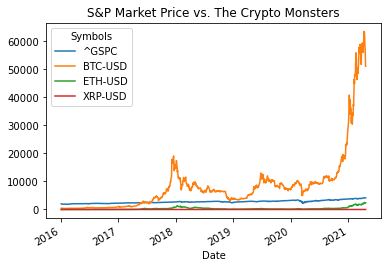

In [ ]:
combined.plot.line(title="S&P Market Price vs. The Crypto Monsters")

pricechartfilename="cryptosandp.png"

plt.savefig(pricechartfilename)

plt.show()

## Step 3 Part 1
Write the data into a spreadsheet named crypto_with_sandp.xlsx

In [ ]:
workbookname="crypto_with_sandp.xlsx"

dataworksheetname="market data"

combined.to_excel(workbookname,sheet_name=dataworksheetname)

## Step 3 Part 2
Now store the image we created earlier into the spreadsheet

The solution came from StackExchange - the main place for tech support


In [ ]:
import openpyxl

# load the workbook we create in Step 3 part 1

wb = openpyxl.load_workbook(workbookname)

# Add a worksheet to the workbook with tab named "chart"

ws = wb.create_sheet("chart",index=2)

# Read in the chart image (graphic) file we created earlier

img = openpyxl.drawing.image.Image(pricechartfilename)

# Add the image we created in the earlier step to our new worksheet

ws.add_image(img)

# Want to do a little improvement to the market data sheet to widen the first column width in the market data sheet

wsmd=wb[dataworksheetname]
wsmd.column_dimensions["A"].width=12

# change the formatting to only show the date

for cell in wsmd["A"]:
    cell.number_format = "YYYY-MM-DD"

# save the workbook back to disk

wb.save(workbookname)